<a href="https://colab.research.google.com/github/UnitForDataScience/Projects-Spring-2024/blob/main/Covid19_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid 19 Pnemonia Diagnosis with Image Classification Models**

## 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Define Data Augmentation and Image Generators

In [3]:
### Link to Data: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data
### this is very small dataset so results will be unstable but good to practice CNNs.
### these codes are illustration purposes for building CNNs with Sequential API.
### Once you learn how CNNs are run in Python, you can challenge yourself to increase accuracy.

### Set directory paths
train_dir = '/content/drive/MyDrive/AI Tutorials /Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/AI Tutorials /Covid19-dataset/test'

In [4]:
tf.random.set_seed(42)

### data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### only rescaling for validation images
test_datagen = ImageDataGenerator(
    rescale=1./255
    )

In [5]:
### Define batch size
batch_size = 8


### training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

### validation generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [6]:
### define steps per epoch based on batch size
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

In [7]:
print("Classes found:", train_generator.class_indices)
print("Total training batches:", len(train_generator))
print("Total validation batches:", len(test_generator))

Classes found: {'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
Total training batches: 32
Total validation batches: 9


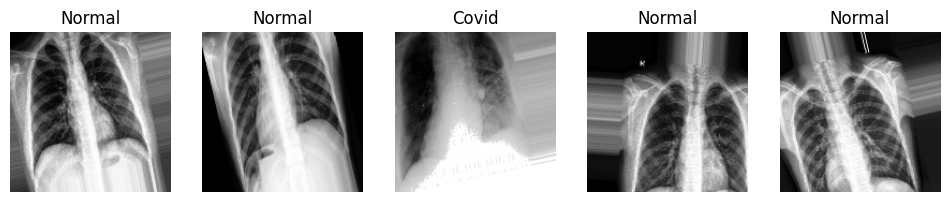

In [8]:
### show some images from train_generator
images, labels = next(train_generator)

num_images = 5
plt.figure(figsize=(12, 6))
for i in range(num_images):
    ax = plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(list(train_generator.class_indices.keys())[label_index])
    plt.axis("off")
plt.show()

### 3. Define CNN Model Architecture

In [9]:
model = Sequential([

    ### First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    ### Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    ### Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    ### Fourth Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    ### Flattening - put into one dimentional vector
    Flatten(),

    ### Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    ### Output Layer (3 classes: Covid, Normal, Viral)
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.Compile the Model

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,044,163 (3.98 MB)

 Trainable params: 1,044,163 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the Model

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.3214 - loss: 1.1367 - val_accuracy: 0.3906 - val_loss: 1.0963
Epoch 2/20
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6250 - loss: 1.0854

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6250 - loss: 1.0854 - val_accuracy: 0.5000 - val_loss: 1.0843
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.4482 - loss: 1.0881 - val_accuracy: 0.3125 - val_loss: 1.0869
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2500 - loss: 1.1004 - val_accuracy: 0.5000 - val_loss: 1.1426
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.4723 - loss: 1.0534 - val_accuracy: 0.7500 - val_loss: 0.8252
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6250 - loss: 0.9479 - val_accuracy: 1.0000 - val_loss: 0.5391
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.5735 - loss: 0.9108 - val_accuracy: 0.5938 - val_loss: 0.9257
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3750 - loss: 0.8339 - val_accuracy: 0.5000 - val_loss: 1.0268
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.6264 - loss: 0.8995 - val_accuracy: 0.6719 - val_los

## 6. Plot Training and Validation Accuracy and Loss

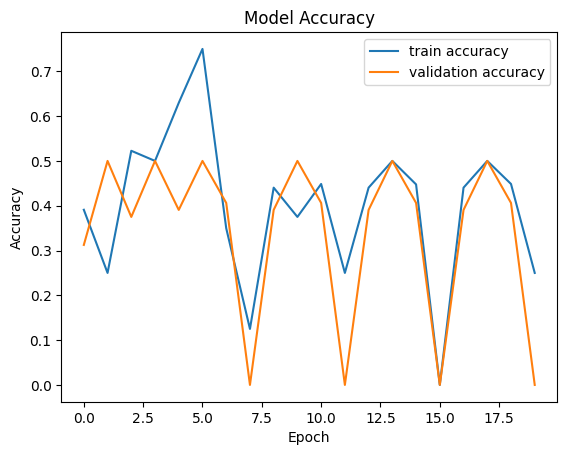

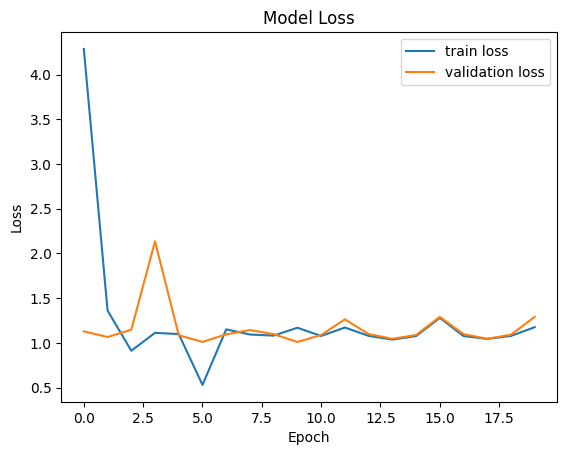

In [19]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Let's Actual vs Predicted X-Rays

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


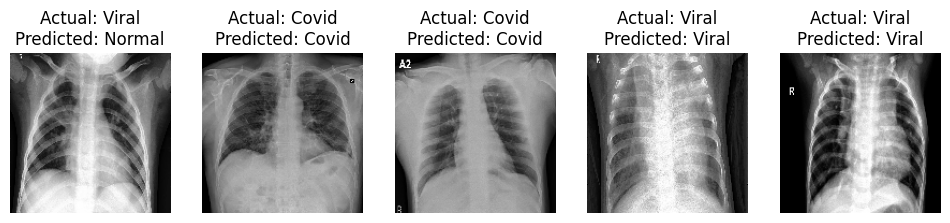

In [13]:
### batch of images and labels
images, actual_labels = next(test_generator)

### predict labels for batch of images
predicted_probabilities = model.predict(images)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
actual_labels = np.argmax(actual_labels, axis=1)

### Class names
class_names = list(test_generator.class_indices.keys())

### Number of images
num_images = 5

### plot images with actual vs. predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_images):
    ax = plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
    # Set the title with actual and predicted labels
    actual_class = class_names[actual_labels[i]]
    predicted_class = class_names[predicted_labels[i]]
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis("off")
plt.show()

## Let's Build AlexNet

In [20]:
### Parameters
batch_size = 8
epochs = 20
img_height, img_width = 227, 227

### Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)



### Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

### Define steps per epoch and validation steps based
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [21]:
### Define AlexNet
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(256, (5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),

    Flatten(),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

In [22]:
### Compile Model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,295,043 (222.38 MB)

 Trainable params: 58,294,339 (222.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [23]:
### train Model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - accuracy: 0.4276 - loss: 14.6591 - val_accuracy: 0.5156 - val_loss: 1.0342
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.7381 - val_accuracy: 0.0000e+00 - val_loss: 1.2283
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.4789 - loss: 0.9852 - val_accuracy: 0.3906 - val_loss: 1.4292
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5000 - loss: 0.8074 - val_accuracy: 0.5000 - val_loss: 0.9015
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.4902 - loss: 1.1088 - val_accuracy: 0.3438 - val_loss: 1.0791
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7500 - loss: 0.5021 - val_accuracy: 0.0000e+00 - val_loss: 1.3217
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.5597 - loss: 0.9271 - val_accuracy: 0.2344 - val_loss: 1.1018
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6250 - loss: 0.9939 - val_a

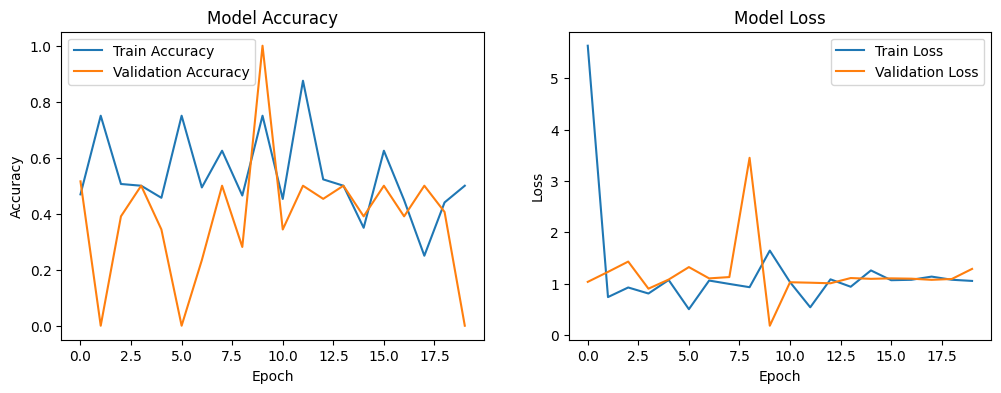

In [24]:
### plot training and validation accuracy and Loss
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()